# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

In [2]:
warnings.filterwarnings("ignore")

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD `signal line` is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [4]:
MACD_slow=26
MACD_fast=12
MACD_signal_line=9

In [5]:
start="2015-01-01"
end="2017-12-31"

In [6]:
tickers=["AAPL"]

In [7]:
AAPL = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
AAPL=AAPL[["Adj Close"]]
AAPL

,Adj Close
Date,
2015-01-02,24.373957
2015-01-05,23.687304
2015-01-06,23.689537
2015-01-07,24.021715
2015-01-08,24.944681
...,...
2017-12-22,41.216583
2017-12-26,40.170925
2017-12-27,40.177982


In [9]:
AAPL["Slow"]=AAPL["Adj Close"].ewm(span=MACD_slow).mean()
AAPL["Fast"]=AAPL["Adj Close"].ewm(span=MACD_fast).mean()
AAPL["MACD"]=AAPL["Fast"]-AAPL["Slow"]
AAPL["MACD_Signal"]=AAPL["MACD"].ewm(span=MACD_signal_line).mean()

In [10]:
AAPL["AAPL_Position"] =(np.where(AAPL["MACD"] > AAPL["MACD_Signal"],1, -1))

### <font color = red> Answer 1 is presented in the cell below: </font>

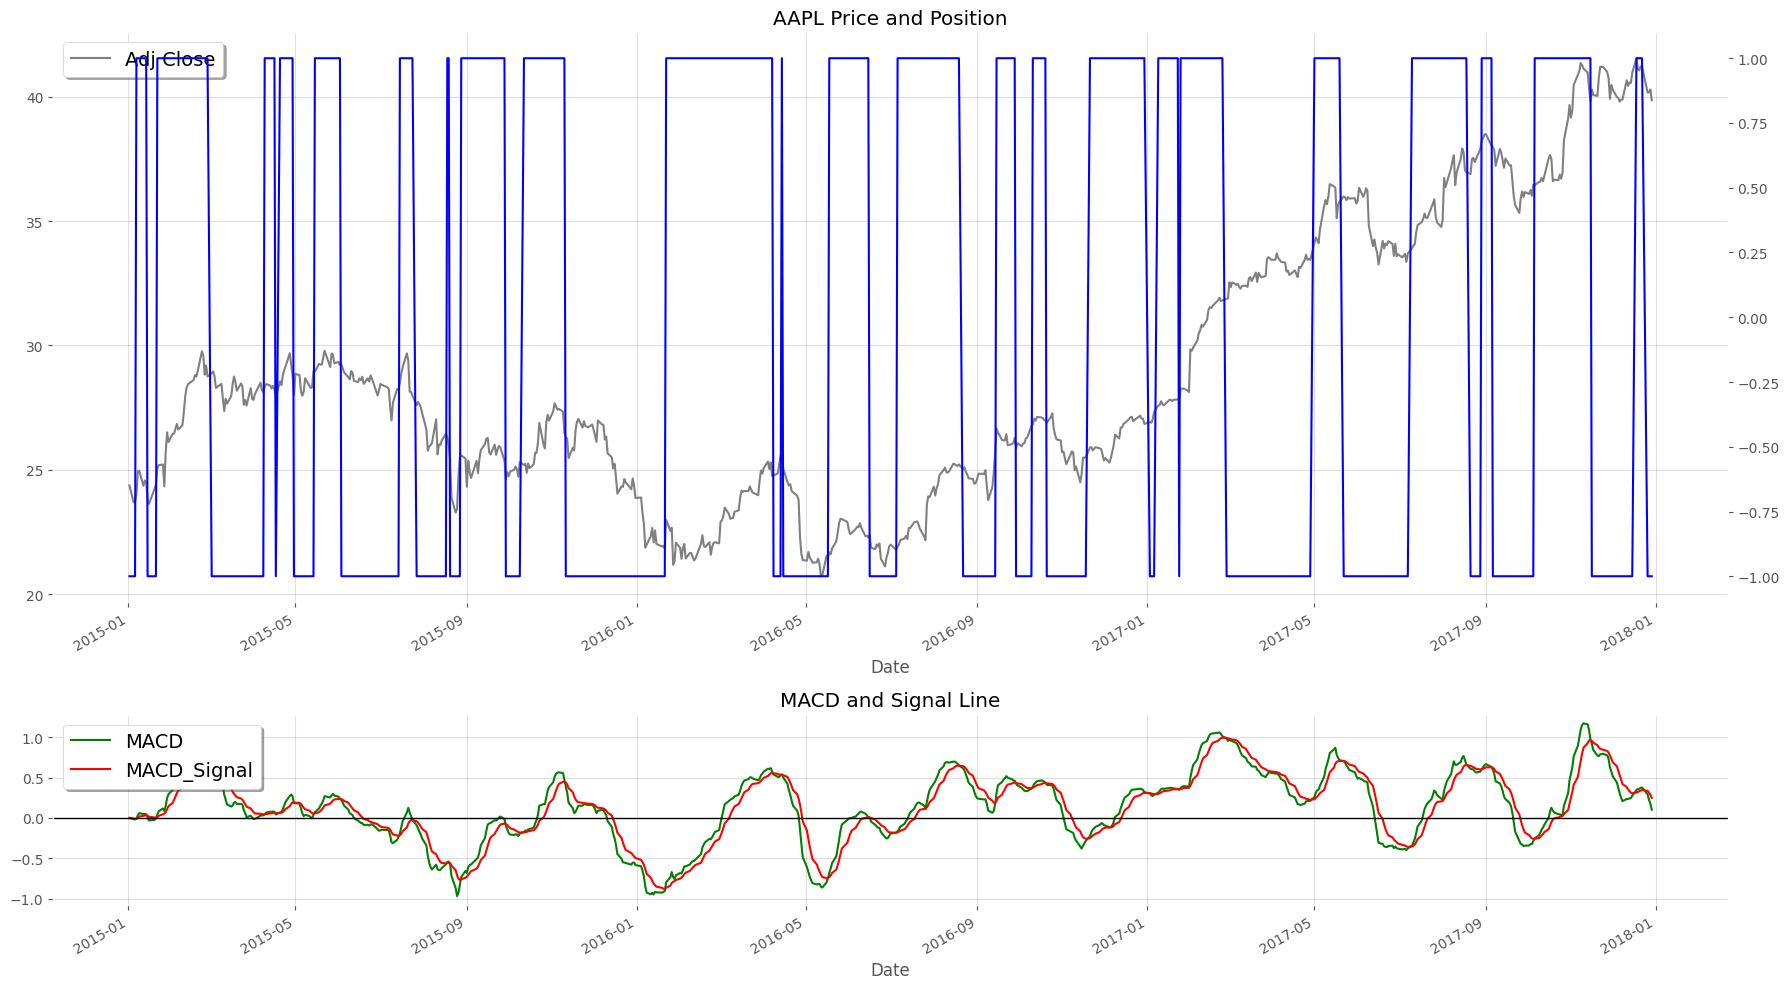

In [11]:
# Create a figure with two subplots (vertically arranged)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot the price and position on the first axis
AAPL[["Adj Close", "AAPL_Position"]].plot(
    secondary_y="AAPL_Position",
    style=["grey", "blue"],
    ax=ax1
)
ax1.set_title('AAPL Price and Position')
ax1.legend(loc="upper left", shadow=True, fancybox=True)

# Plot the MACD and MACD Signal on the second axis
AAPL[["MACD", "MACD_Signal"]].plot(
    style=["green", "red"],
    ax=ax2
)
ax2.set_title('MACD and Signal Line')
ax2.axhline(0, color='black', linewidth=1)  # Add a horizontal line at MACD=0
ax2.legend(loc="upper left", shadow=True, fancybox=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [12]:
Initial_Capital = 100000
Commission =5

In [13]:
AAPL["AAPL_log_returns"] =\
(
    np
    .log(AAPL["Adj Close"] / AAPL["Adj Close"].shift(1)
        )
)

In [14]:
AAPL["strategy_log_returns"] =\
(
    AAPL["AAPL_Position"]
    .shift(1) 
    * 
    AAPL["AAPL_log_returns"]
)

AAPL["strategy_log_returns"]

Date
2015-01-02         NaN
2015-01-05    0.028576
2015-01-06   -0.000094
2015-01-07   -0.013925
2015-01-08    0.037702
                ...   
2017-12-22    0.000000
2017-12-26   -0.025697
2017-12-27   -0.000176
2017-12-28   -0.002810
2017-12-29    0.010873
Name: strategy_log_returns, Length: 755, dtype: float64

In [15]:
# Initialize the Capital column with NaN values
AAPL["Capital"] = np.nan

# Set the first value of Capital to the initial value (Initial_Capital )
AAPL.iloc[0, AAPL.columns.get_loc("Capital")] = Initial_Capital 

# Loop through each row starting from the second row to calculate capital
for row in range(1, len(AAPL)):
    # Calculate the absolute difference in positions (trade detection)
    Trade = abs(AAPL.iloc[row, AAPL.columns.get_loc("AAPL_Position")] - AAPL.iloc[row-1, AAPL.columns.get_loc("AAPL_Position")])
    
    # Update the capital based on the previous capital and strategy returns
    AAPL.iloc[row, AAPL.columns.get_loc("Capital")] = AAPL.iloc[row-1, AAPL.columns.get_loc("Capital")] * \
        (np.exp(AAPL.iloc[row, AAPL.columns.get_loc("strategy_log_returns")])) - Trade * Commission

In [16]:
AAPL

,Adj Close,Slow,Fast,MACD,MACD_Signal,AAPL_Position,AAPL_log_returns,strategy_log_returns,Capital
Date,,,,,,,,,
2015-01-02,24.373957,24.373957,24.373957,0.000000,0.000000,-1,NaN,NaN,100000.000000
2015-01-05,23.687304,24.017425,24.002020,-0.015406,-0.008559,-1,-0.028576,0.028576,102898.823566
2015-01-06,23.689537,23.899618,23.880058,-0.019561,-0.013068,-1,0.000094,-0.000094,102889.122023
2015-01-07,24.021715,23.933751,23.924773,-0.008978,-0.011682,1,0.013925,-0.013925,101456.346236
2015-01-08,24.944681,24.168190,24.201879,0.033689,0.001815,1,0.037702,0.037702,105354.517443
...,...,...,...,...,...,...,...,...,...
2017-12-22,41.216583,40.501304,40.878420,0.377115,0.346860,1,0.000000,0.000000,208928.545012
2017-12-26,40.170925,40.476832,40.769574,0.292743,0.336037,-1,-0.025697,-0.025697,203618.061308
2017-12-27,40.177982,40.454695,40.678560,0.223865,0.313602,-1,0.000176,-0.000176,203582.296164


In [17]:
Percentage_Return = (AAPL["Capital"][-1]/Initial_Capital - 1)*100
Percentage_Return

105.23040723623333

### <font color = red> Answer 2 </font>

    The answer is 105 % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [18]:
AAPL["max_gross_performance"] =\
(
    AAPL
    ["Capital"]
    .cummax()
)

<Axes: xlabel='Date'>

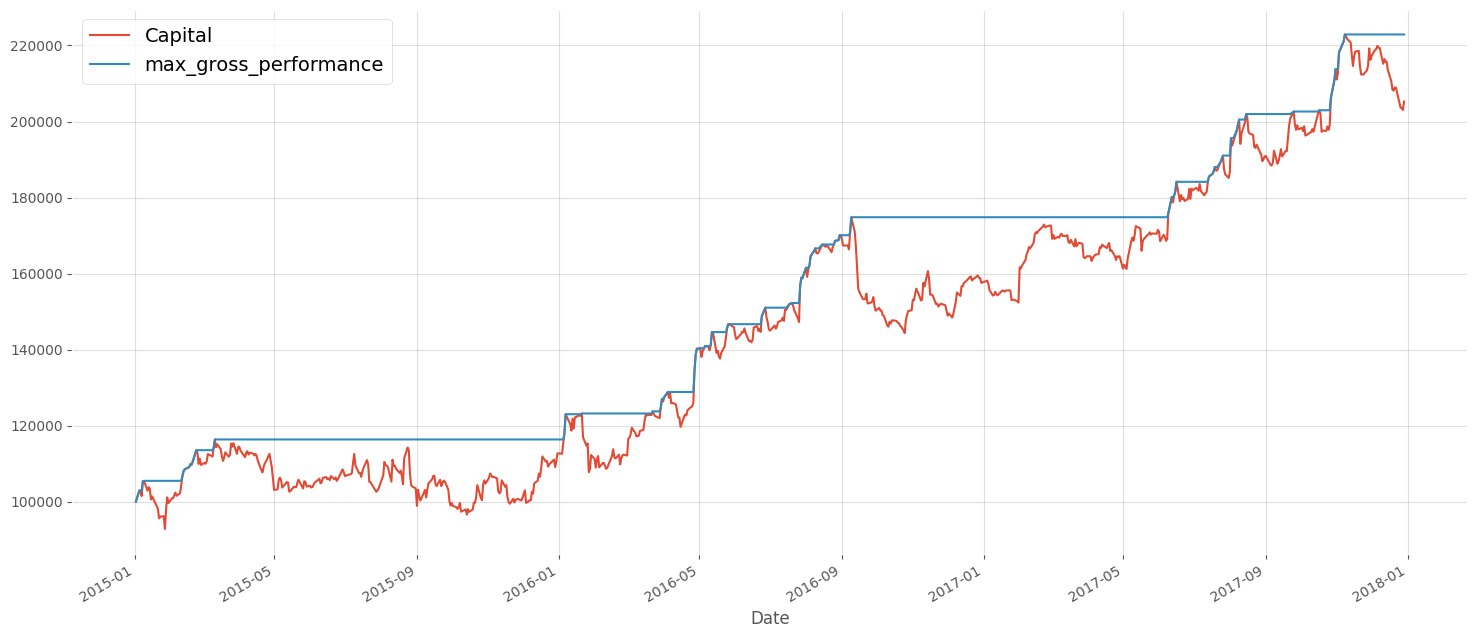

In [19]:
(
    AAPL
    [["Capital", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [20]:
AAPL['Drawdown'] =  AAPL["Capital"] / AAPL["max_gross_performance"] -1
AAPL['Drawdown']

Date
2015-01-02    0.000000
2015-01-05    0.000000
2015-01-06   -0.000094
2015-01-07   -0.014018
2015-01-08    0.000000
                ...   
2017-12-22   -0.062696
2017-12-26   -0.086520
2017-12-27   -0.086681
2017-12-28   -0.089243
2017-12-29   -0.079287
Name: Drawdown, Length: 755, dtype: float64

In [21]:
AAPL['MaxDrawdown'] = AAPL['Drawdown'].cummin()

In [22]:
# Initialize 'HighWaterMarkDate' column with NaN or AAPL's index, which is likely the date
AAPL['HighWaterMarkDate'] = pd.NaT

# Iterate over the rows
for row in range(1, len(AAPL)):
    if AAPL['Drawdown'].iloc[row] == 0:
        # Set the HighWaterMarkDate as the current row's index (assumed to be date)
        AAPL.loc[AAPL.index[row], 'HighWaterMarkDate'] = AAPL.index[row]
    else:
        # Carry forward the previous row's HighWaterMarkDate
        AAPL.loc[AAPL.index[row], 'HighWaterMarkDate'] = AAPL['HighWaterMarkDate'].iloc[row - 1]

# Ensure the 'HighWaterMarkDate' column is in datetime format
AAPL['HighWaterMarkDate'] = pd.to_datetime(AAPL['HighWaterMarkDate'])

In [23]:
#Calculate duration of drawdown
AAPL['DrawdownDuration'] = AAPL['HighWaterMarkDate']-AAPL.index

In [24]:
#Calculate duration of maximum drawdown
AAPL['MaximumDrawdownDuration'] = AAPL['DrawdownDuration'].cummin()

In [25]:
AAPL

,Adj Close,Slow,Fast,MACD,MACD_Signal,AAPL_Position,AAPL_log_returns,strategy_log_returns,Capital,max_gross_performance,Drawdown,MaxDrawdown,HighWaterMarkDate,DrawdownDuration,MaximumDrawdownDuration
Date,,,,,,,,,,,,,,,
2015-01-02,24.373957,24.373957,24.373957,0.000000,0.000000,-1,NaN,NaN,100000.000000,100000.000000,0.000000,0.000000,NaT,NaT,NaT
2015-01-05,23.687304,24.017425,24.002020,-0.015406,-0.008559,-1,-0.028576,0.028576,102898.823566,102898.823566,0.000000,0.000000,2015-01-05,0 days,0 days
2015-01-06,23.689537,23.899618,23.880058,-0.019561,-0.013068,-1,0.000094,-0.000094,102889.122023,102898.823566,-0.000094,-0.000094,2015-01-05,-1 days,-1 days
2015-01-07,24.021715,23.933751,23.924773,-0.008978,-0.011682,1,0.013925,-0.013925,101456.346236,102898.823566,-0.014018,-0.014018,2015-01-05,-2 days,-2 days
2015-01-08,24.944681,24.168190,24.201879,0.033689,0.001815,1,0.037702,0.037702,105354.517443,105354.517443,0.000000,-0.014018,2015-01-08,0 days,-2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.216583,40.501304,40.878420,0.377115,0.346860,1,0.000000,0.000000,208928.545012,222903.704026,-0.062696,-0.174254,2017-11-08,-44 days,-300 days
2017-12-26,40.170925,40.476832,40.769574,0.292743,0.336037,-1,-0.025697,-0.025697,203618.061308,222903.704026,-0.086520,-0.174254,2017-11-08,-48 days,-300 days
2017-12-27,40.177982,40.454695,40.678560,0.223865,0.313602,-1,0.000176,-0.000176,203582.296164,222903.704026,-0.086681,-0.174254,2017-11-08,-49 days,-300 days


In [26]:
AAPL[AAPL["Drawdown"]==0].index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-08', '2015-01-09',
               '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17',
               '2015-02-18', '2015-02-20', '2015-02-23', '2015-03-10',
               '2015-03-11', '2016-01-06', '2016-01-07', '2016-01-21',
               '2016-03-22', '2016-03-29', '2016-03-30', '2016-04-01',
               '2016-04-04', '2016-04-27', '2016-04-28', '2016-04-29',
               '2016-05-02', '2016-05-06', '2016-05-11', '2016-05-12',
               '2016-05-25', '2016-05-26', '2016-06-24', '2016-06-27',
               '2016-07-18', '2016-07-19', '2016-07-20', '2016-07-27',
               '2016-07-28', '2016-08-01', '2016-08-04', '2016-08-05',
               '2016-08-08', '2016-08-09', '2016-08-15', '2016-08-26',
               '2016-08-29', '2016-08-30', '2016-09-08', '2016-09-09',
               '2017-06-09', '2017-06-12', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-07-14', '2017-07-17', '2017-07-18',
      

In [27]:
Drawdown_Days = []
Drawdown_Amount = []

# Loop through recovery points
for i in range(len(AAPL[AAPL["Drawdown"]==0].index)-1):
    # Calculate days between recovery points
    days = (AAPL[AAPL["Drawdown"]==0].index[i+1]-AAPL[AAPL["Drawdown"]==0].index[i]).days
    
    # Find the maximum drawdown in the period
    max_drawdown = AAPL.loc[AAPL[AAPL["Drawdown"]==0].index[i]:AAPL[AAPL["Drawdown"]==0].index[i+1]]["Drawdown"].min()
    
    # Store the results
    Drawdown_Days.append(days)
    Drawdown_Amount.append(max_drawdown)

In [28]:
current_drawdown_period =\
(
    AAPL.index[-1]
    -
    AAPL[AAPL["Drawdown"] == 0].index[-1]
).days

current_drawdown_period # returns timedelta

51

In [29]:
current_maximum_drawdown_amount=AAPL["Drawdown"].loc[AAPL[AAPL["Drawdown"] == 0].index[-1]:AAPL.index[-1]].min()

current_maximum_drawdown_amount

-0.08924302011131968

In [30]:
# Store the results
Drawdown_Days.append(current_drawdown_period)
Drawdown_Amount.append(float(current_maximum_drawdown_amount))

In [31]:
drawdown = pd.DataFrame([Drawdown_Days,Drawdown_Amount]).T
drawdown.columns = ["days", "drawdown"]
drawdown.loc[drawdown["drawdown"].nsmallest(5).index]

,days,drawdown
47,273.0,-0.174254
12,301.0,-0.170011
15,61.0,-0.125456
3,33.0,-0.120145
73,51.0,-0.089243


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown 17.4% | Duration 273 Days
    
    The 2nd worst drawdown period : Net drawdown 17.0 % | Duration 301 Days
     
    The 3rd worst drawdown period : Net drawdown 12.5 % | Duration 61 Days
         
    The 4th worst drawdown period : Net drawdown 12.0 % | Duration 33 Days
    
    The 5th worst drawdown period : Net drawdown 8.9 % | Duration 51 Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [32]:
Annual_Returns = {}
years = [2015, 2016, 2017]  # Add more years as needed

for year in years:
    start_date = dt.datetime(year, 1, 1)
    end_date = dt.datetime(year + 1, 1, 1)
    apple_year = AAPL.loc[start_date:end_date].copy()
    
    if not apple_year.empty:
        start_capital = apple_year["Capital"].iloc[0]
        end_capital = apple_year["Capital"].iloc[-1]
        returns = (end_capital - start_capital) / start_capital
        Annual_Returns[str(year)] = returns
    else:
        Annual_Returns[str(year)] = None  # or handle missing data appropriately

In [33]:
Annual_Returns 

{'2015': 0.1270112729504623,
 '2016': 0.3991622101462825,
 '2017': 0.29899722848323884}

### <font color = red> Answer 4 </font>

    Below average year(s) : 2015
    
    Above average year(s) : 2016,2017
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [34]:
Sharpe =\
(
    (
     AAPL["strategy_log_returns"].mean() 
     / 
     AAPL["strategy_log_returns"].std()
    ) * np.sqrt(252)
)

In [35]:
Sharpe

1.0565873502781575

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 1.06
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

In [36]:
MACD_slow=26
MACD_fast=12
MACD_signal_line=9

start="2015-01-01"
end="2017-12-31"

Initial_Capital = 100000
Commission =5

In [37]:
def MACD_Stock_Positions(Ticker:str , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end):
    tickers=[Ticker]
    prices_df = yf.download(tickers, start=start, end=end)
    MACD_df = prices_df[["Adj Close"]]
    MACD_df["Slow"]=MACD_df["Adj Close"].ewm(span=MACD_slow).mean()
    MACD_df["Fast"]=MACD_df["Adj Close"].ewm(span=MACD_fast).mean()
    MACD_df["MACD"]=MACD_df["Fast"]-MACD_df["Slow"]
    MACD_df["MACD_Signal"]=MACD_df["MACD"].ewm(span=MACD_signal_line).mean()
    MACD_df["Position"] =(np.where(MACD_df["MACD"] > MACD_df["MACD_Signal"],1, -1))
    
    # Create a figure with two subplots (vertically arranged)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Plot the price and position on the first axis
    MACD_df[["Adj Close", "Position"]].plot(
        secondary_y="Position",
        style=["grey", "blue"],
        ax=ax1
    )
    ax1.set_title(f'{Ticker} Price and Position')
    ax1.legend(loc="upper left", shadow=True, fancybox=True)

    # Plot the MACD and MACD Signal on the second axis
    MACD_df[["MACD", "MACD_Signal"]].plot(
        style=["green", "red"],
        ax=ax2
    )
    ax2.set_title('MACD and Signal Line')
    ax2.axhline(0, color='black', linewidth=1)  # Add a horizontal line at MACD=0
    ax2.legend(loc="upper left", shadow=True, fancybox=True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    Ticker=MACD_df
    
    return Ticker
        

[*********************100%%**********************]  1 of 1 completed


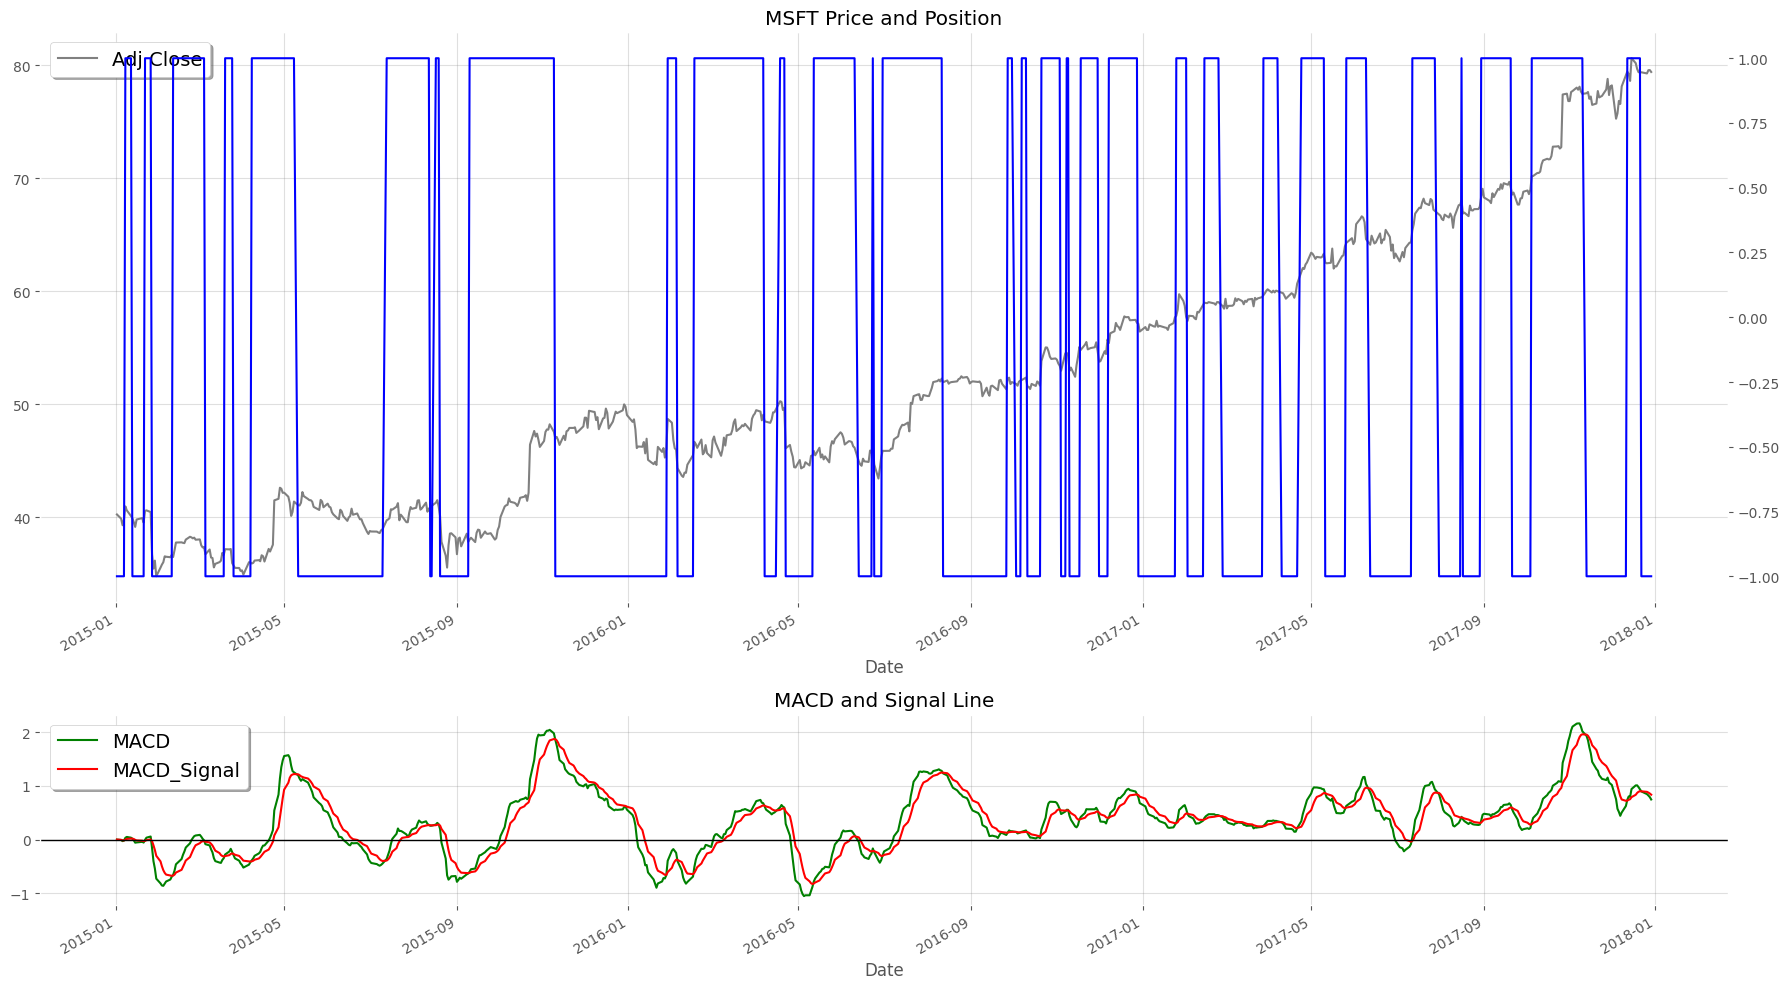

In [38]:
MSFT = MACD_Stock_Positions(Ticker="MSFT" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


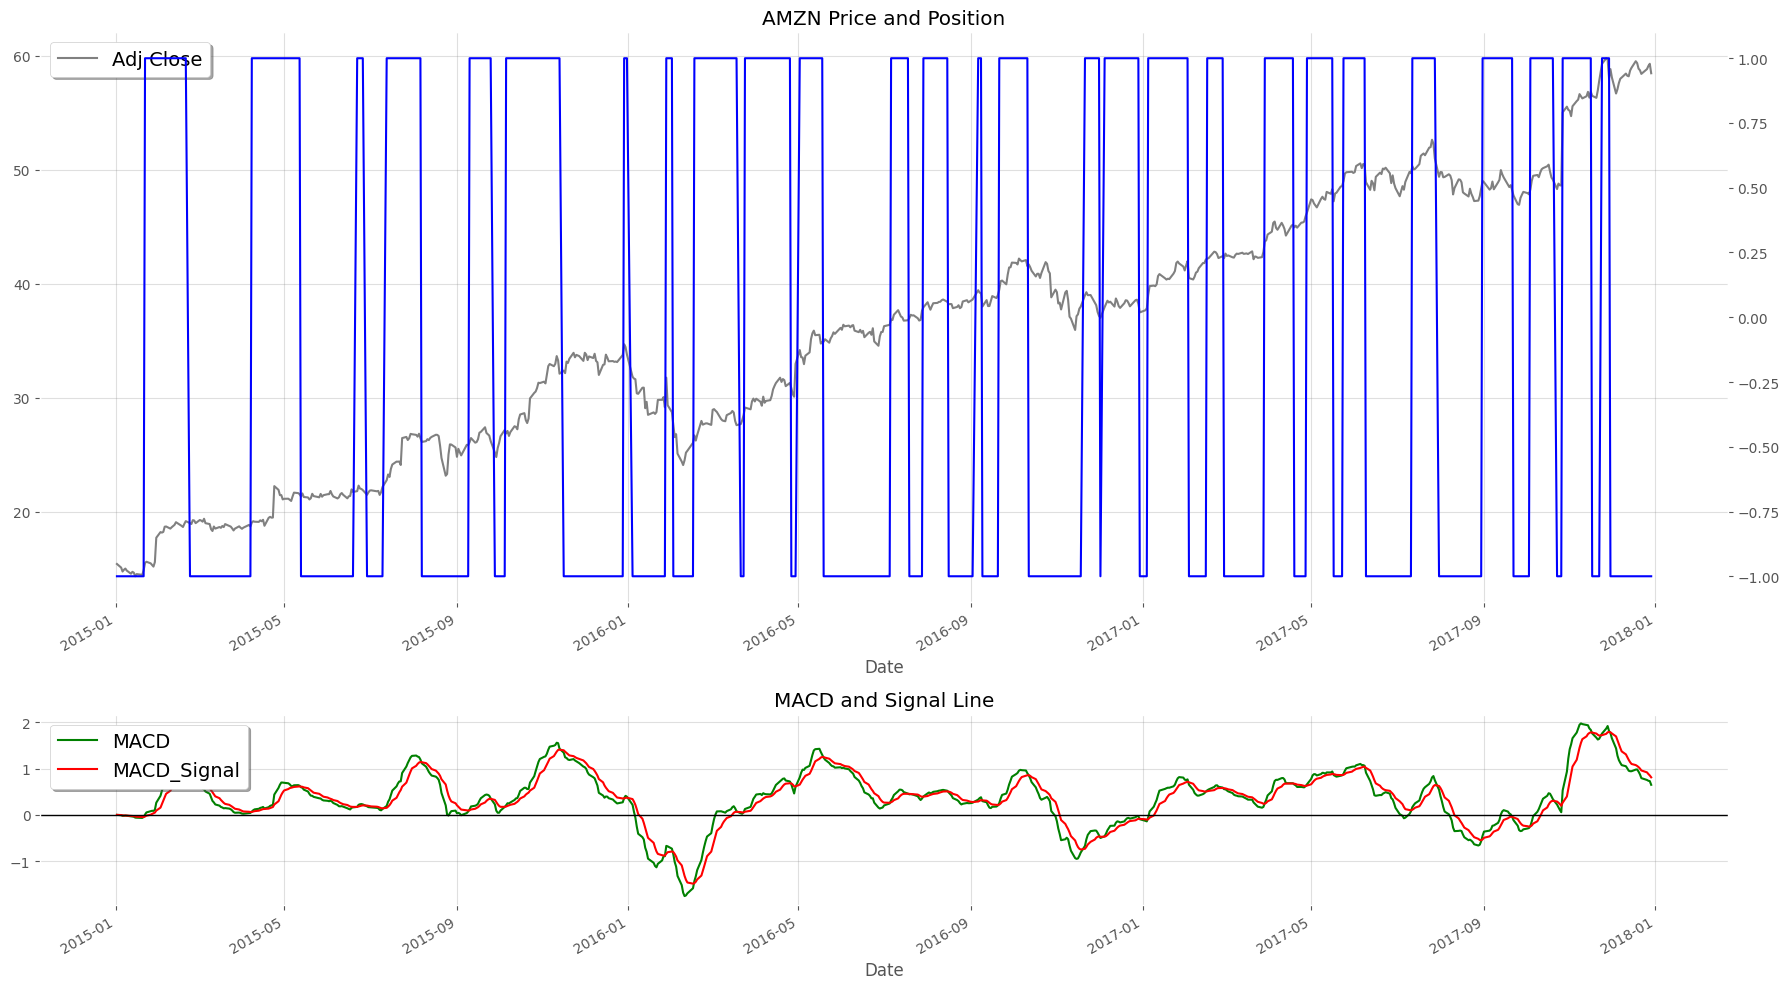

In [39]:
AMZN = MACD_Stock_Positions(Ticker="AMZN" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


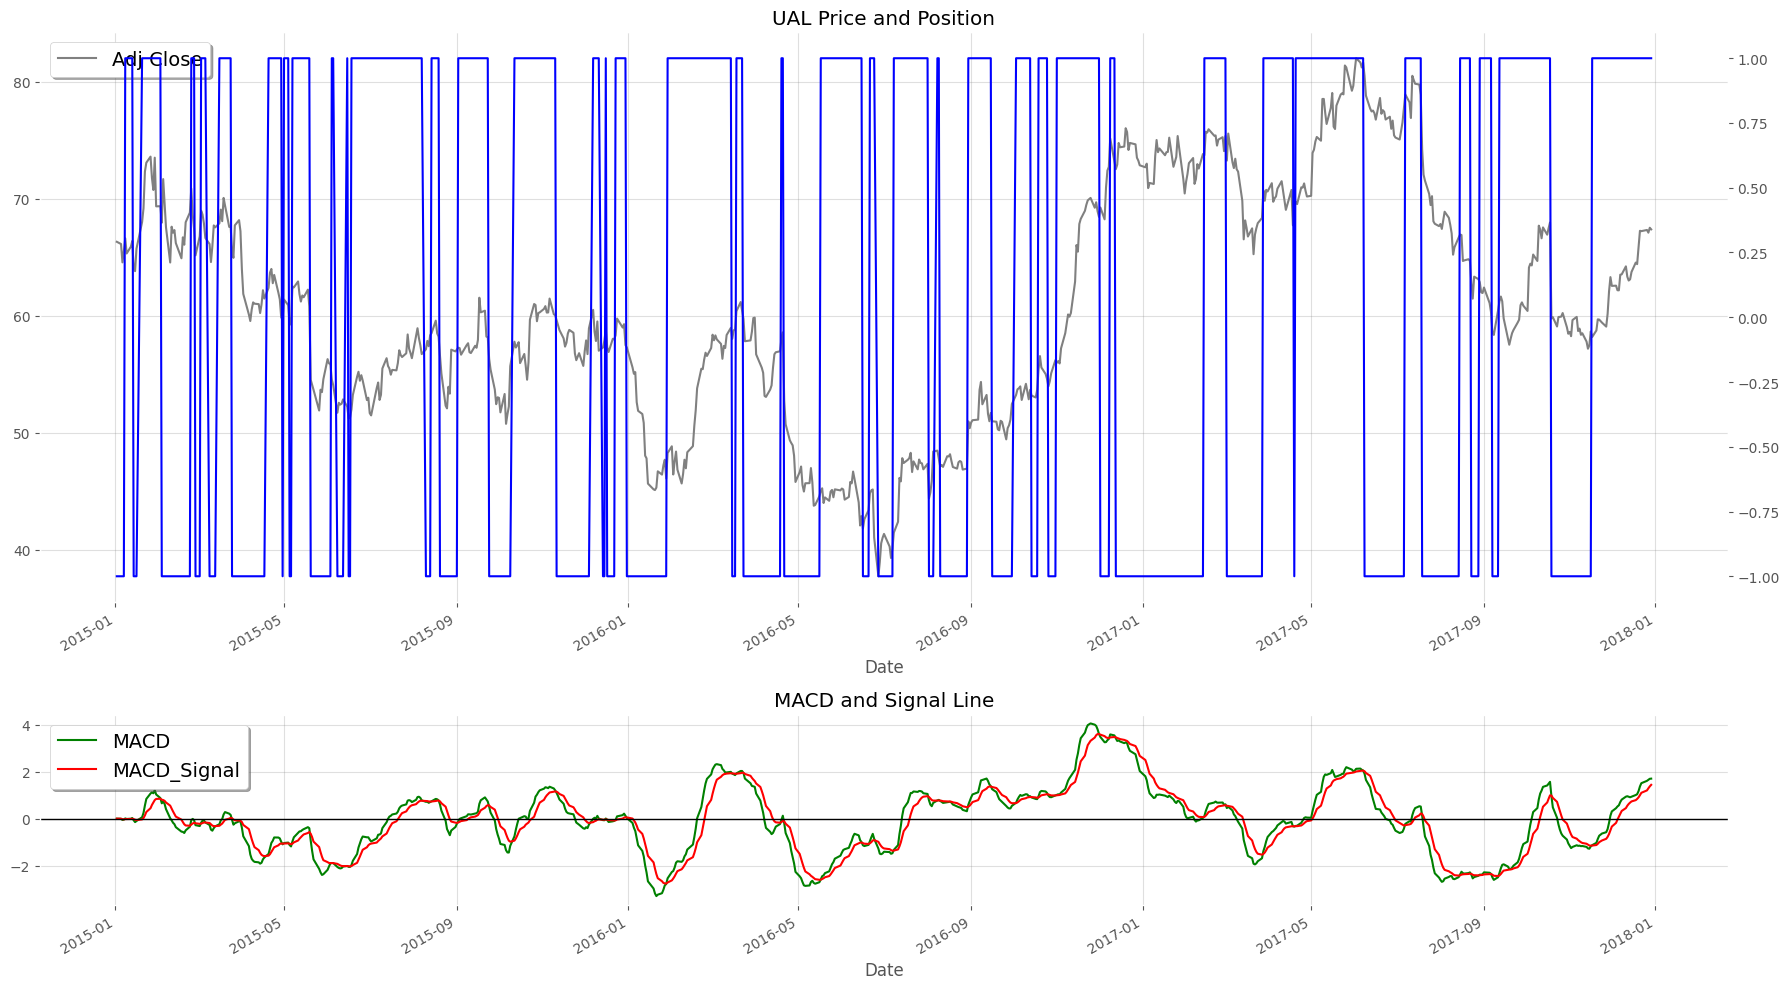

In [40]:
UAL = MACD_Stock_Positions(Ticker="UAL" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


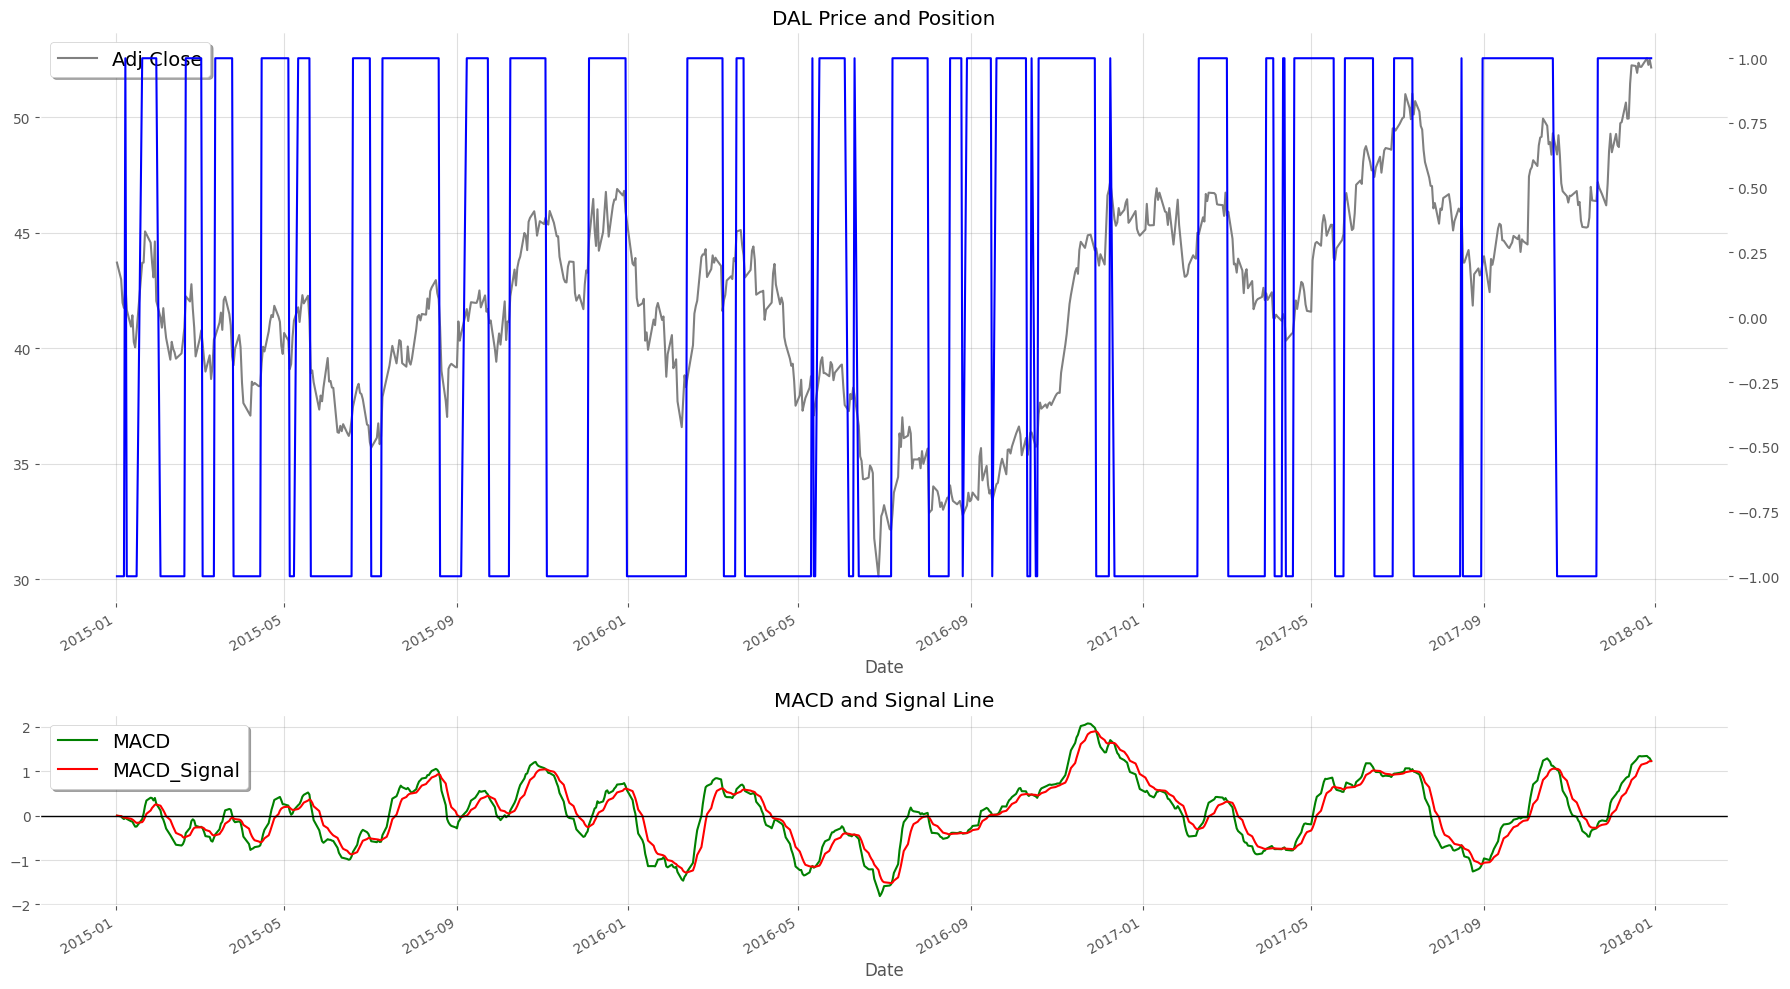

In [41]:
DAL = MACD_Stock_Positions(Ticker="DAL" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


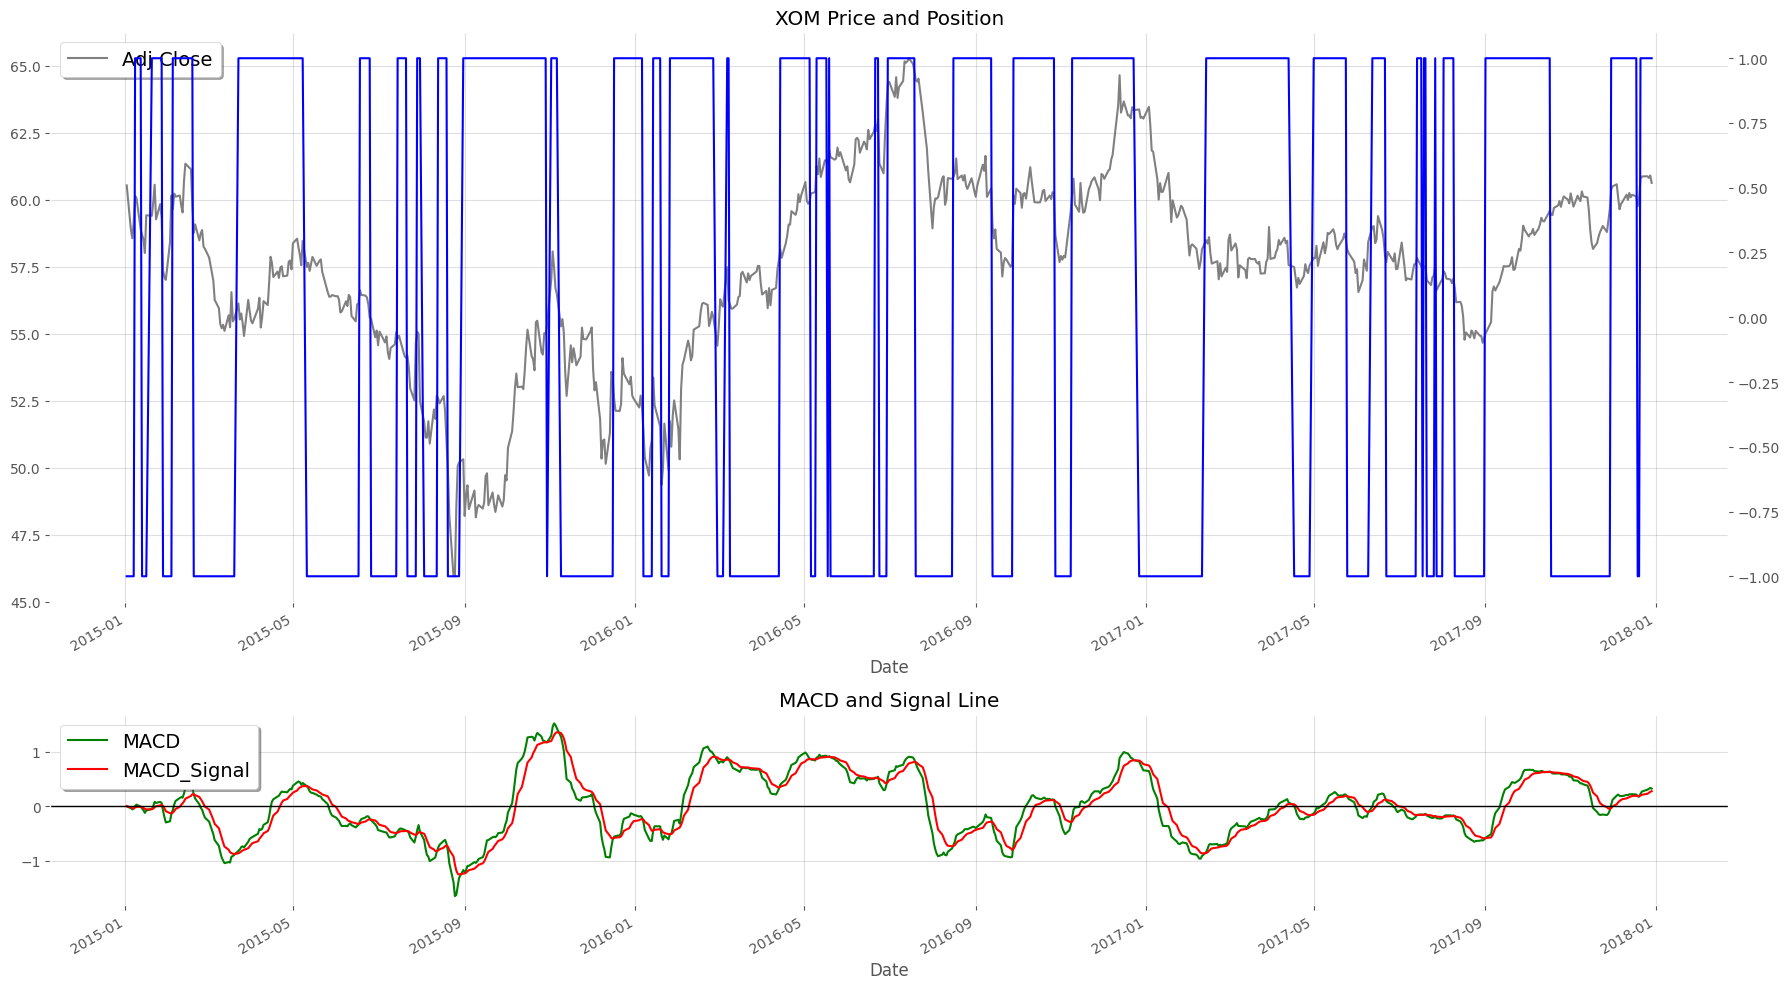

In [42]:
XOM = MACD_Stock_Positions(Ticker="XOM" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


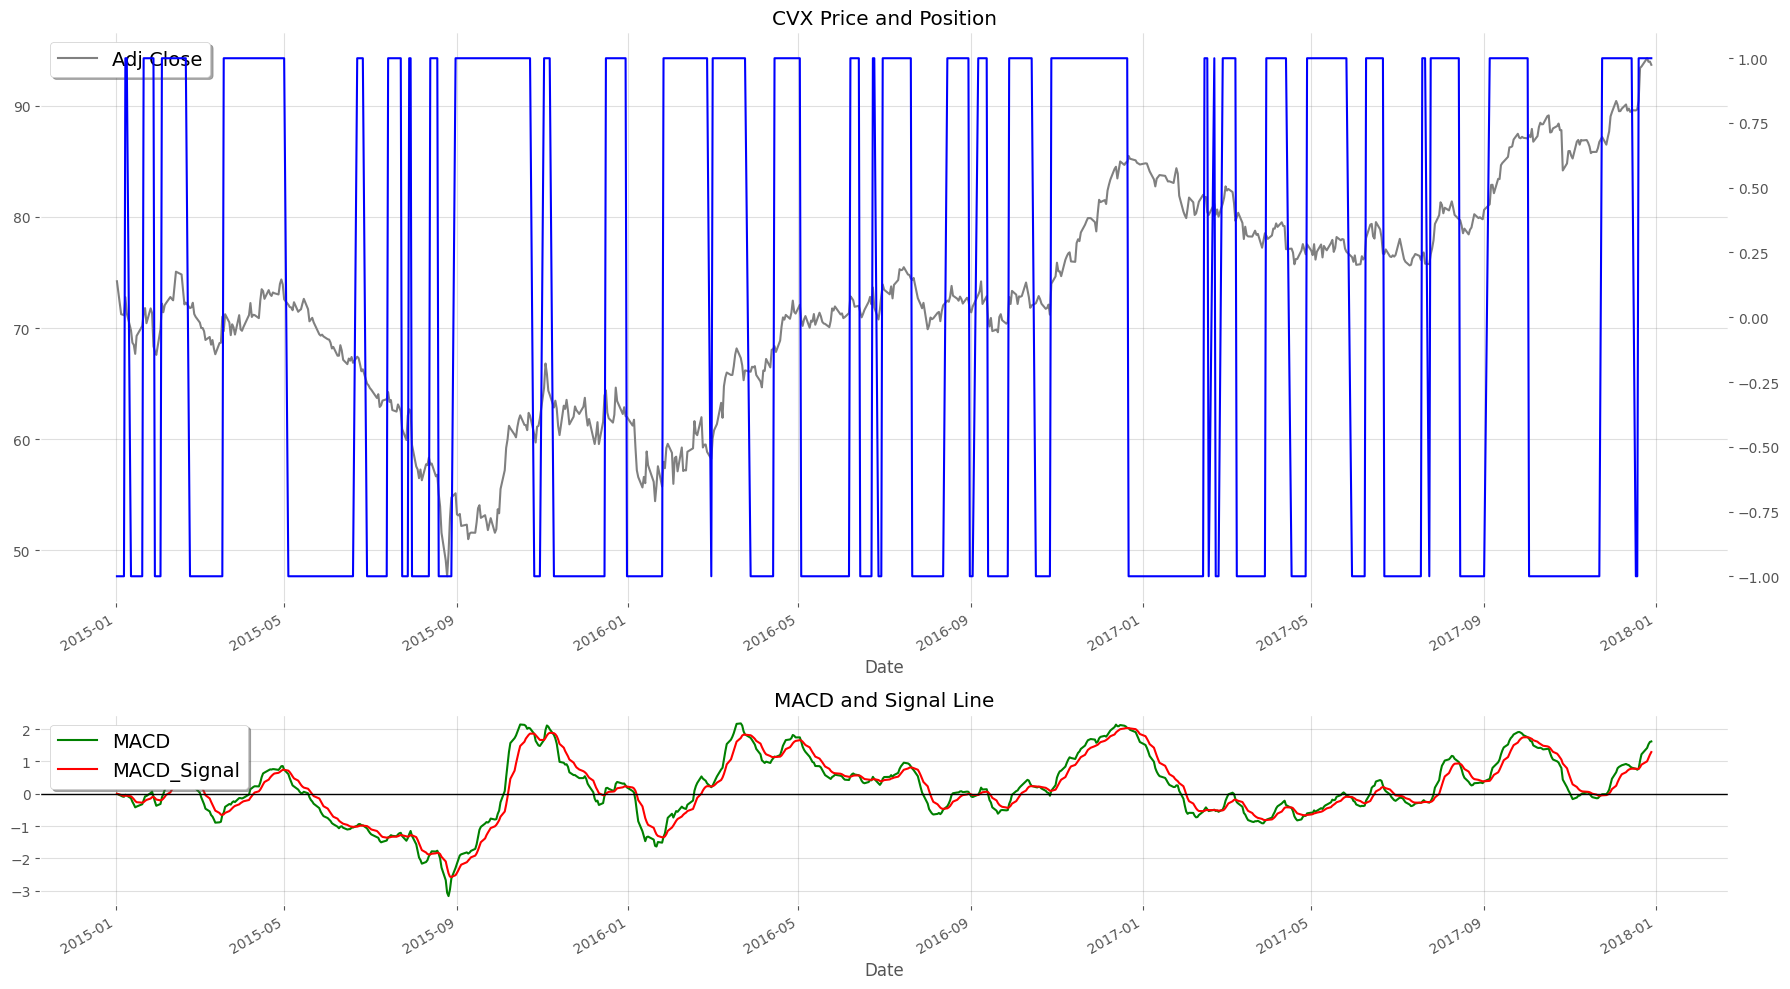

In [43]:
CVX = MACD_Stock_Positions(Ticker="CVX" , MACD_slow=MACD_slow, MACD_fast=MACD_fast, MACD_signal_line=MACD_signal_line, start=start, end=end)

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [44]:
def MACD_Cumulative_Returns(Ticker:pd.DataFrame , Initial_Capital=Initial_Capital, Commission=Commission):
    Ticker["log_returns"] =(np.log(Ticker["Adj Close"] / Ticker["Adj Close"].shift(1)))
    Ticker["strategy_log_returns"] =(Ticker["Position"].shift(1) * Ticker["log_returns"])

    # Initialize the Capital column with NaN values
    Ticker["Capital"] = np.nan

    # Set the first value of Capital to the initial value (Initial_Capital )
    Ticker.iloc[0, Ticker.columns.get_loc("Capital")] = Initial_Capital 

    # Loop through each row starting from the second row to calculate capital
    for row in range(1, len(Ticker)):
        # Calculate the absolute difference in positions (trade detection)
        Trade = abs(Ticker.iloc[row, Ticker.columns.get_loc("Position")] - Ticker.iloc[row-1, Ticker.columns.get_loc("Position")])
        
        # Update the capital based on the previous capital and strategy returns
        Ticker.iloc[row, Ticker.columns.get_loc("Capital")] = Ticker.iloc[row-1, Ticker.columns.get_loc("Capital")] * \
            (np.exp(Ticker.iloc[row, Ticker.columns.get_loc("strategy_log_returns")])) - Trade * Commission
            
    Percentage_Return = (Ticker["Capital"][-1]/Initial_Capital - 1)*100
    
    print(f"The percentage cumulative return over this period is {Percentage_Return:.2f}%")
    
    return Ticker

In [45]:
MSFT = MACD_Cumulative_Returns(Ticker = MSFT , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is -30.97%


In [46]:
AMZN = MACD_Cumulative_Returns(Ticker = AMZN , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is -28.62%


In [47]:
UAL = MACD_Cumulative_Returns(Ticker = UAL , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is -60.88%


In [48]:
DAL = MACD_Cumulative_Returns(Ticker = DAL , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is 8.72%


In [49]:
XOM = MACD_Cumulative_Returns(Ticker = XOM , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is -35.35%


In [50]:
CVX = MACD_Cumulative_Returns(Ticker = CVX , Initial_Capital=Initial_Capital, Commission=Commission)

The percentage cumulative return over this period is -19.00%


### <font color = red> Answer 7 </font>

    The answer is DAL .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [51]:
def MACD_Drawdown(Ticker:pd.DataFrame):

    Ticker["max_gross_performance"] =(Ticker["Capital"].cummax())
    Ticker[["Capital", "max_gross_performance"]].dropna().plot(figsize = [18, 8])
    Ticker['Drawdown'] =  Ticker["Capital"] / Ticker["max_gross_performance"] -1         
    Ticker['MaxDrawdown'] = Ticker['Drawdown'].cummin()
    
    # Initialize 'HighWaterMarkDate' column with NaN or Ticker's index, which is likely the date
    Ticker['HighWaterMarkDate'] = pd.NaT

    # Iterate over the rows
    for row in range(1, len(Ticker)):
        if Ticker['Drawdown'].iloc[row] == 0:
            # Set the HighWaterMarkDate as the current row's index (assumed to be date)
            Ticker.loc[Ticker.index[row], 'HighWaterMarkDate'] = Ticker.index[row]
        else:
            # Carry forward the previous row's HighWaterMarkDate
            Ticker.loc[Ticker.index[row], 'HighWaterMarkDate'] = Ticker['HighWaterMarkDate'].iloc[row - 1]

    # Ensure the 'HighWaterMarkDate' column is in datetime format
    Ticker['HighWaterMarkDate'] = pd.to_datetime(Ticker['HighWaterMarkDate'])
    
    #Calculate duration of drawdown
    Ticker['DrawdownDuration'] = Ticker['HighWaterMarkDate']-Ticker.index
    
    #Calculate duration of maximum drawdown
    Ticker['MaximumDrawdownDuration'] = Ticker['DrawdownDuration'].cummin()
    
    MaxDrawdown=Ticker['MaxDrawdown'][-1]*100
    MaximumDrawdownDuration=Ticker['MaximumDrawdownDuration'][-1]
    
    print (f'Maximum drawdown is {MaxDrawdown:.2f}%')
    print (f'Maximum drawdown duration is {MaximumDrawdownDuration}')
    
    return Ticker
                    

Maximum drawdown is -50.68%
Maximum drawdown duration is -708 days +00:00:00


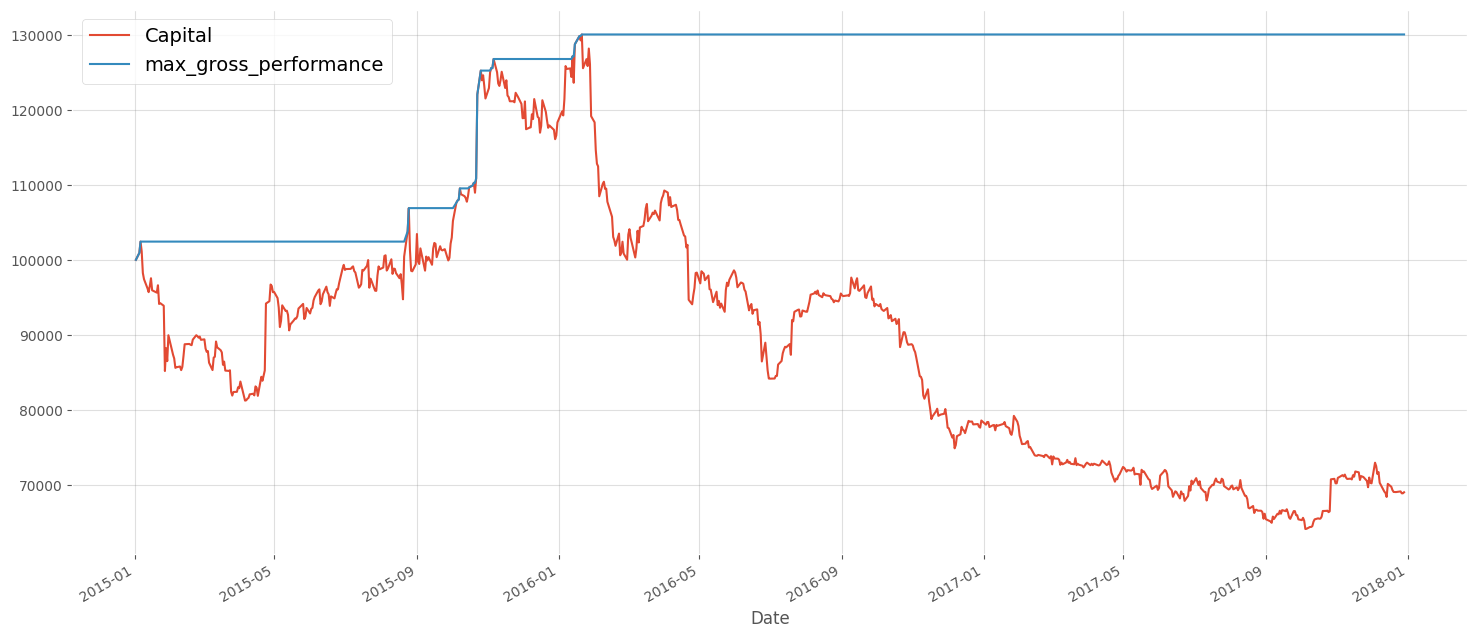

In [52]:
MSFT = MACD_Drawdown(Ticker = MSFT)

Maximum drawdown is -56.48%
Maximum drawdown duration is -779 days +00:00:00


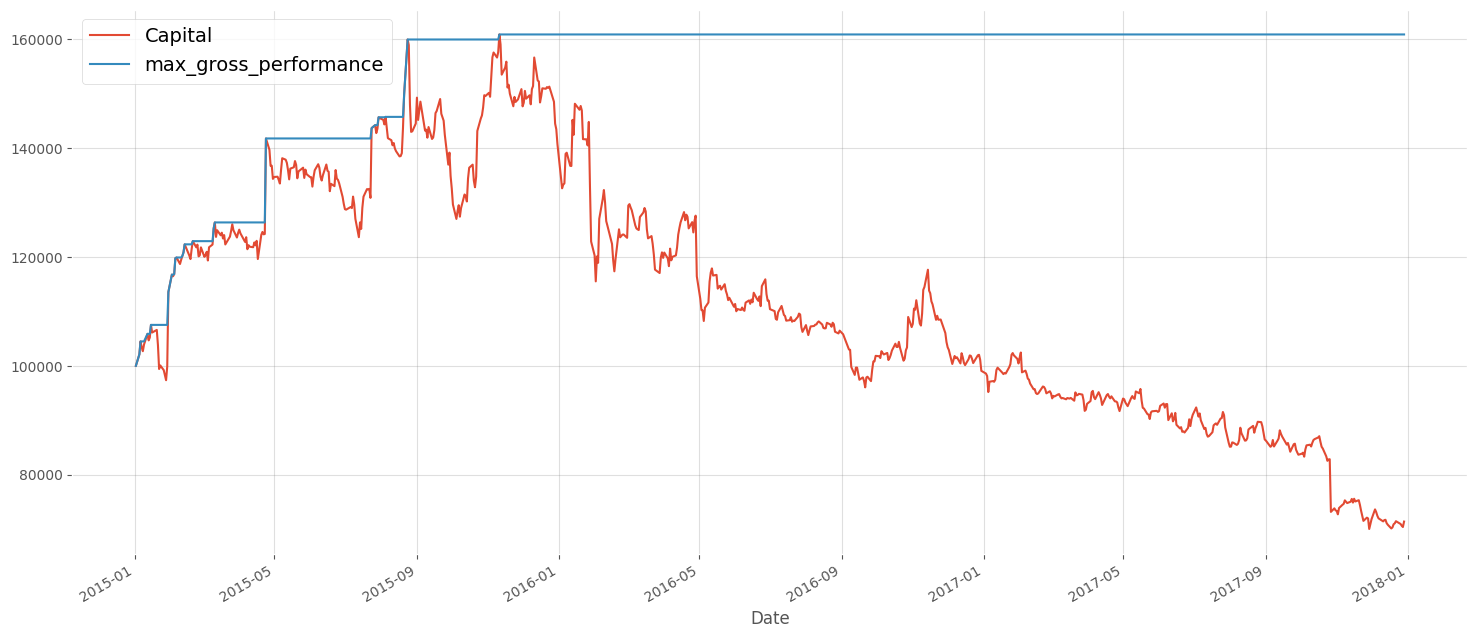

In [53]:
AMZN = MACD_Drawdown(Ticker = AMZN)

Maximum drawdown is -70.43%
Maximum drawdown duration is -1088 days +00:00:00


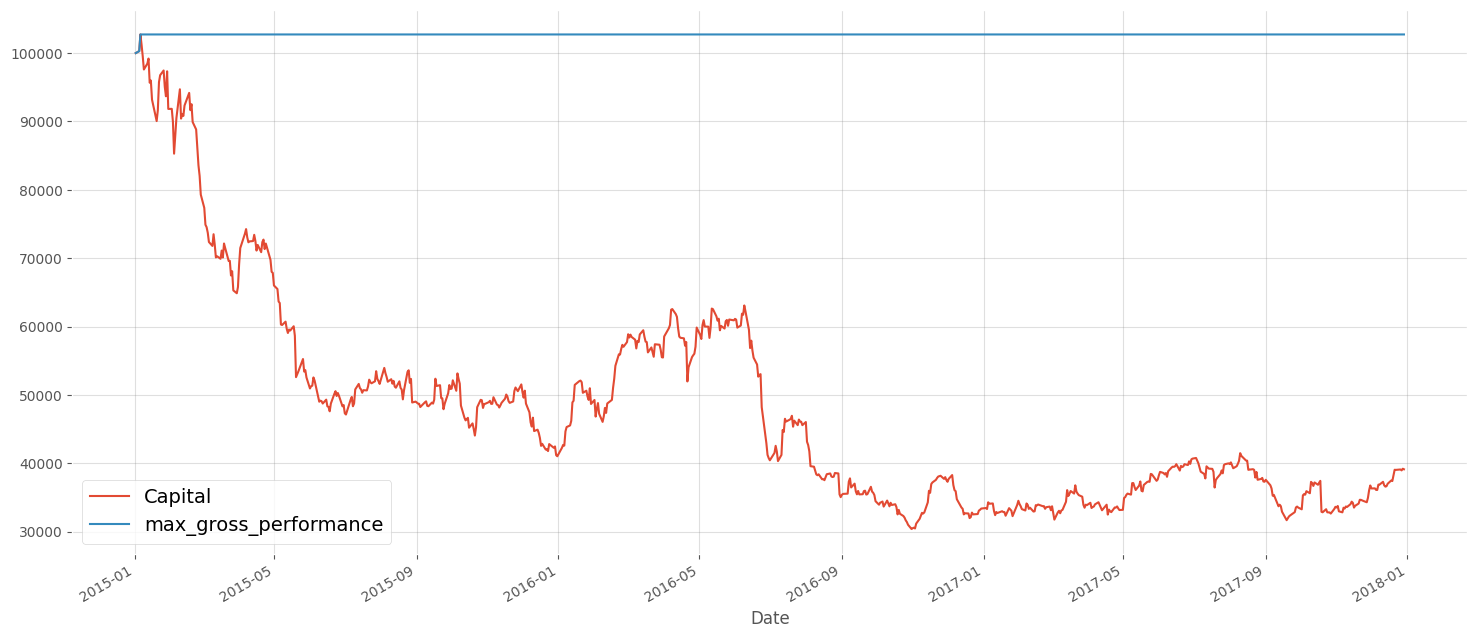

In [54]:
UAL = MACD_Drawdown(Ticker = UAL)

Maximum drawdown is -38.44%
Maximum drawdown duration is -1066 days +00:00:00


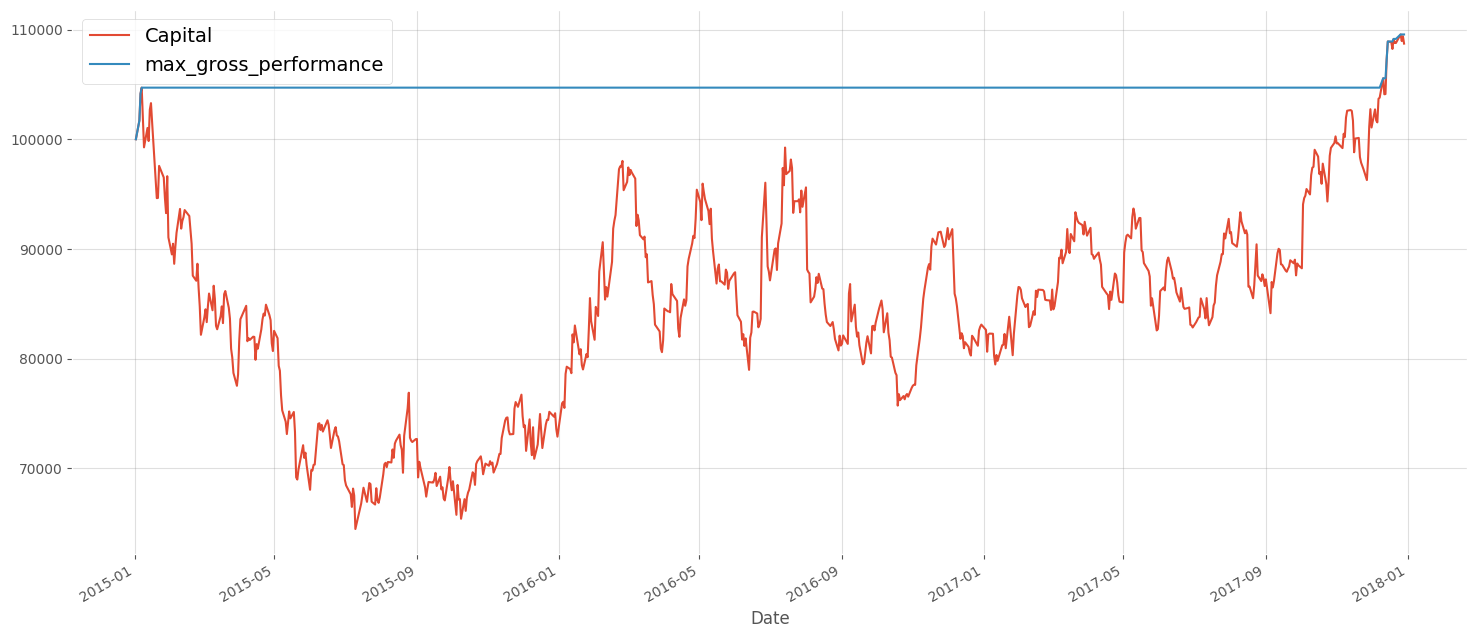

In [55]:
DAL = MACD_Drawdown(Ticker = DAL)

Maximum drawdown is -42.16%
Maximum drawdown duration is -1088 days +00:00:00


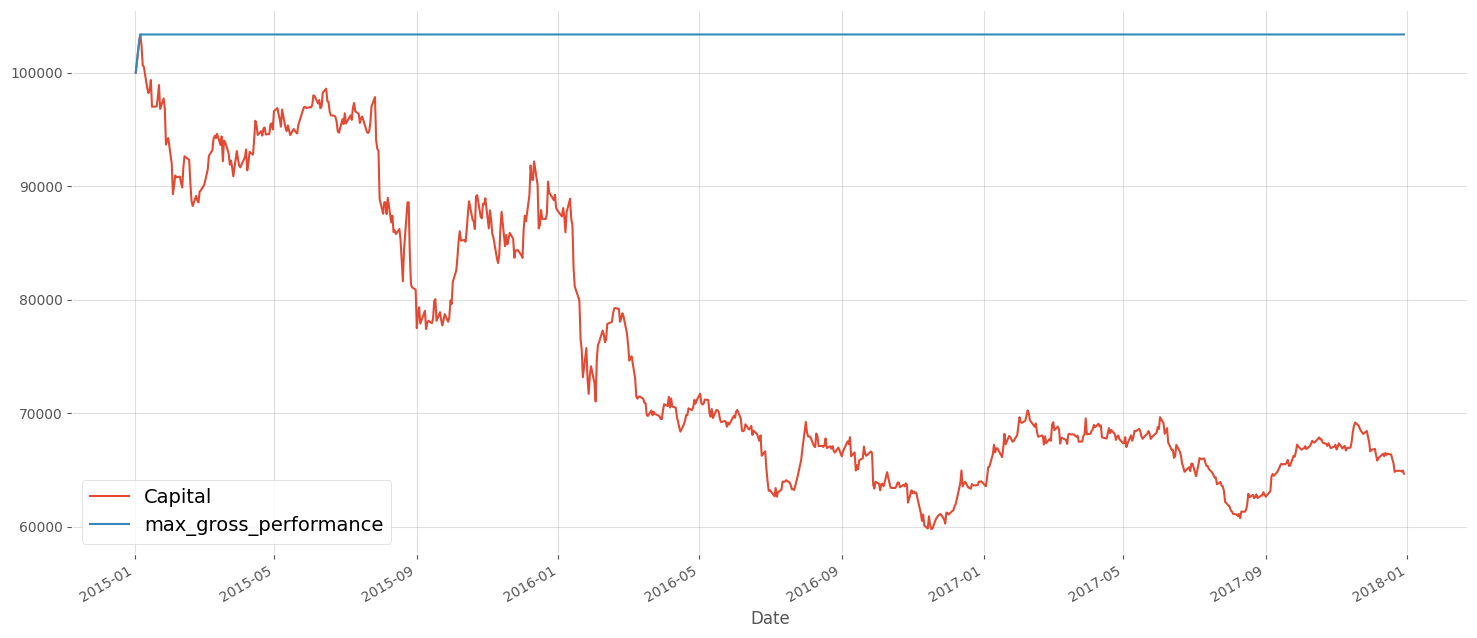

In [56]:
XOM = MACD_Drawdown(Ticker = XOM)

Maximum drawdown is -35.42%
Maximum drawdown duration is -1087 days +00:00:00


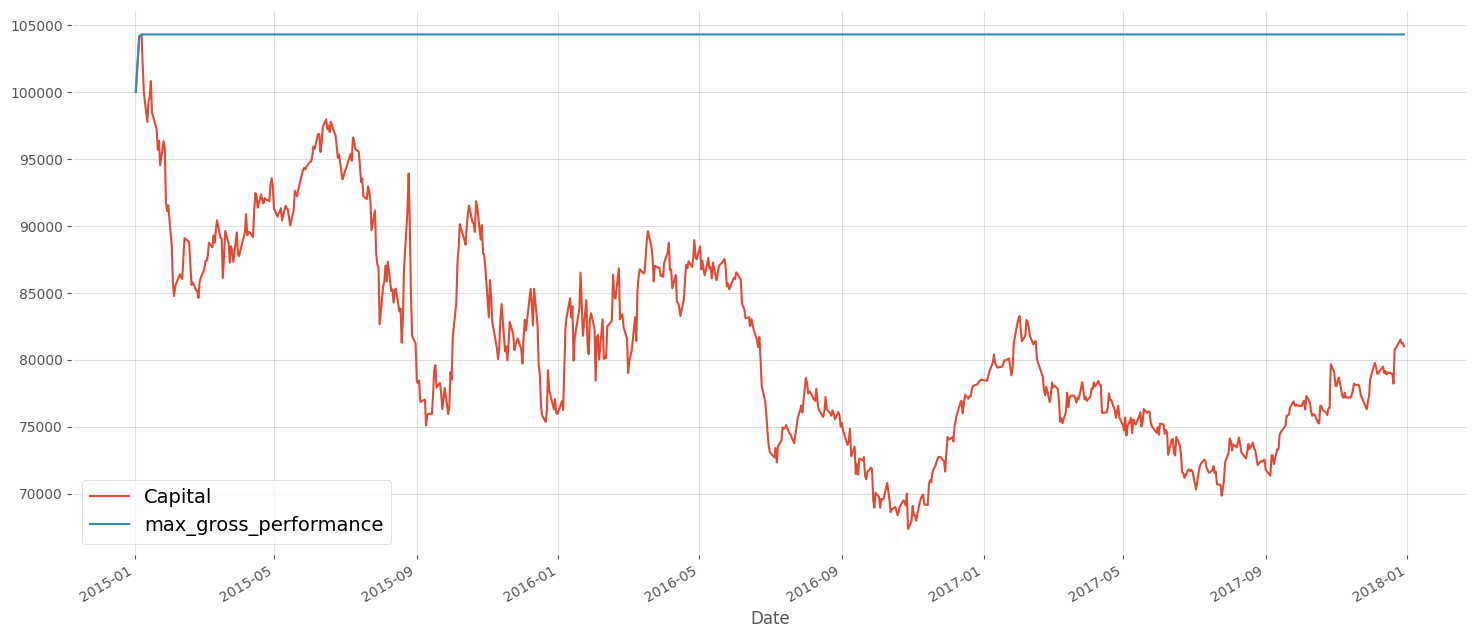

In [57]:
CVX = MACD_Drawdown(Ticker = CVX)

### <font color = red> Answer 8 </font>

    The answer is UAL .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [58]:
def MACD_Best_Years(Ticker:pd.DataFrame, Name:str):

    years = [2015, 2016, 2017]  # Add more years as needed
    Annual_Returns = pd.DataFrame(index=[Name],columns=years)

    for year in years:
        start_date = dt.datetime(year, 1, 1)
        end_date = dt.datetime(year + 1, 1, 1)
        
        # Slice the DataFrame for the given year
        ticker_year = Ticker.loc[start_date:end_date].copy()
        
        # Ensure there is data for the year
        if not ticker_year.empty:
            start_capital = ticker_year["Capital"].iloc[0]
            end_capital = ticker_year["Capital"].iloc[-1]
            returns = (end_capital - start_capital) / start_capital
            Annual_Returns.loc[Name, year] = returns  
        else:
            Annual_Returns.loc[Name, year] = None 
            
    return Annual_Returns

In [59]:
MSFT_Years = MACD_Best_Years(Ticker = MSFT, Name = "MSFT")

In [60]:
AMZN_Years = MACD_Best_Years(Ticker = AMZN, Name = "AMZN")

In [61]:
UAL_Years = MACD_Best_Years(Ticker = UAL, Name = "UAL")

In [62]:
DAL_Years = MACD_Best_Years(Ticker = DAL, Name = "DAL")

In [63]:
XOM_Years = MACD_Best_Years(Ticker = XOM, Name = "XOM")

In [64]:
CVX_Years = MACD_Best_Years(Ticker = CVX, Name = "CVX")

In [65]:
Combined_years=pd.concat([MSFT_Years,AMZN_Years,UAL_Years,DAL_Years,XOM_Years,CVX_Years])

In [66]:
Combined_years

,2015,2016,2017
MSFT,0.183178,-0.343903,-0.115439
AMZN,0.407208,-0.252897,-0.275857
UAL,-0.589836,-0.21045,0.16948
DAL,-0.271211,0.094551,0.316069
XOM,-0.121279,-0.267204,0.017356
CVX,-0.240526,0.021136,0.032855


In [67]:
Combined_years.idxmax(axis=0)

2015    AMZN
2016     DAL
2017     DAL
dtype: object

### <font color = red> Answer 9 </font>

    The answer is in 2015, AMZN showed the best performance, in 2016, DAL showed the best performance, in 2017, DAL showed the best performance.

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [68]:
def MACD_Sharpe(Ticker:pd.DataFrame):

    Sharpe = (Ticker["strategy_log_returns"].mean() / Ticker["strategy_log_returns"].std()) * np.sqrt(252)
    
    return Sharpe

In [69]:
MSFT_Sharpe = MACD_Sharpe(Ticker = MSFT)
MSFT_Sharpe

-0.5391079959438222

In [70]:
AMZN_Sharpe = MACD_Sharpe(Ticker = AMZN)
AMZN_Sharpe

-0.3925162357095347

In [71]:
UAL_Sharpe = MACD_Sharpe(Ticker = UAL)
UAL_Sharpe

-0.8781151928102748

In [72]:
DAL_Sharpe = MACD_Sharpe(Ticker = DAL)
DAL_Sharpe

0.10498507176948577

In [73]:
XOM_Sharpe = MACD_Sharpe(Ticker = XOM)
XOM_Sharpe

-0.7853701095198001

In [74]:
CVX_Sharpe = MACD_Sharpe(Ticker = CVX)
CVX_Sharpe

-0.30266576635490083

### <font color = red> Answer 10 </font>

    MSFT -0.54
    
    AMZN -0.39

    UAL  -0.88

    DAL  0.10

    XOM  -0.79
    
    CVX  -0.30

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>